<a href="https://colab.research.google.com/github/maticvl/dataHacker/blob/master/pyTorch/008_DataLoaders_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision import datasets, transforms
import torch
import matplotlib.pyplot as plt

In [2]:
from torchvision import datasets
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Extracting ../data-unversioned/p1ch7/cifar-10-python.tar.gz to ../data-unversioned/p1ch7/
Files already downloaded and verified


In [3]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [4]:
len(cifar10)

50000

In [5]:
image, label = cifar10[0]

In [6]:
type(image)

PIL.Image.Image

In [7]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [8]:
print(label)
print(classes[label])

6
frog


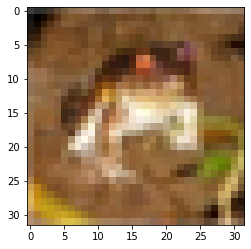

In [9]:
plt.imshow(image)

In [10]:
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [11]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(image)

In [12]:
type(image)

PIL.Image.Image

In [13]:
img_t.shape

torch.Size([3, 32, 32])

In [14]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

In [15]:
tensor_cifar10[0][1]

6

In [16]:
tensor_cifar10.classes[6]

'frog'

In [17]:
tensor_cifar10[0][0].dtype

torch.float32

In [18]:
img_t.min()

tensor(0.)

In [19]:
img_t.max()

tensor(1.)

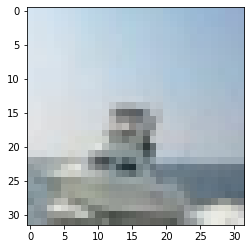

In [20]:
plt.imshow(tensor_cifar10[100][0].permute(1, 2, 0))

In [21]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)

In [24]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [25]:
tensor_cifar10[0][0].shape

torch.Size([3, 32, 32])

In [26]:
temp = imgs.view(3, -1)

In [27]:
temp.shape

torch.Size([3, 51200000])

In [28]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [29]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [31]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [32]:
transformed_cifar10 = datasets.CIFAR10(
data_path, train=True, download=False,
transform=transforms.Compose([
transforms.ToTensor(),
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


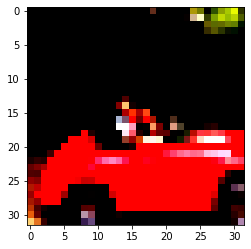

In [33]:
img_t, _ = transformed_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))

In [34]:
label_map = {0: 0, 2: 1}
cifar2 = [(img, label_map[label]) for img, label in transformed_cifar10 if label in [0, 2]]

In [35]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

In [36]:
for imgs, labels in train_loader:
  print(labels)

tensor([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0])
tensor([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])
tensor([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1])
tensor([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,

In [37]:
print(labels.shape)
print(imgs.shape)

torch.Size([16])
torch.Size([16, 3, 32, 32])
